In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
data = pd.read_csv("employee_data.csv")
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [51]:
data.isnull().sum()


EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64

In [52]:
data.fillna(data.mean(numeric_only=True), inplace=True)

In [53]:
for col in data.select_dtypes(include=["object"]).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_728\3788169067.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [54]:
data.drop_duplicates(inplace=True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [56]:
data.isnull().sum()

EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64

In [57]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [58]:
# EDA, exploratory data analysis
#describing the data
data.describe()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


In [59]:
data.var(numeric_only=True)
data.std(numeric_only=True)
data.mean(numeric_only=True)

EmployeeID             50.50
Age                    36.57
Salary              72820.00
YearsAtCompany         10.80
PerformanceScore       84.94
dtype: float64

In [60]:
data.corr(numeric_only=True)

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
EmployeeID,1.000000,-0.023041,0.100207,0.021620,0.151666
Age,-0.023041,1.000000,0.281416,0.946127,0.305288
Salary,0.100207,0.281416,1.000000,0.413361,0.874773
YearsAtCompany,0.021620,0.946127,0.413361,1.000000,0.443331
PerformanceScore,0.151666,0.305288,0.874773,0.443331,1.000000


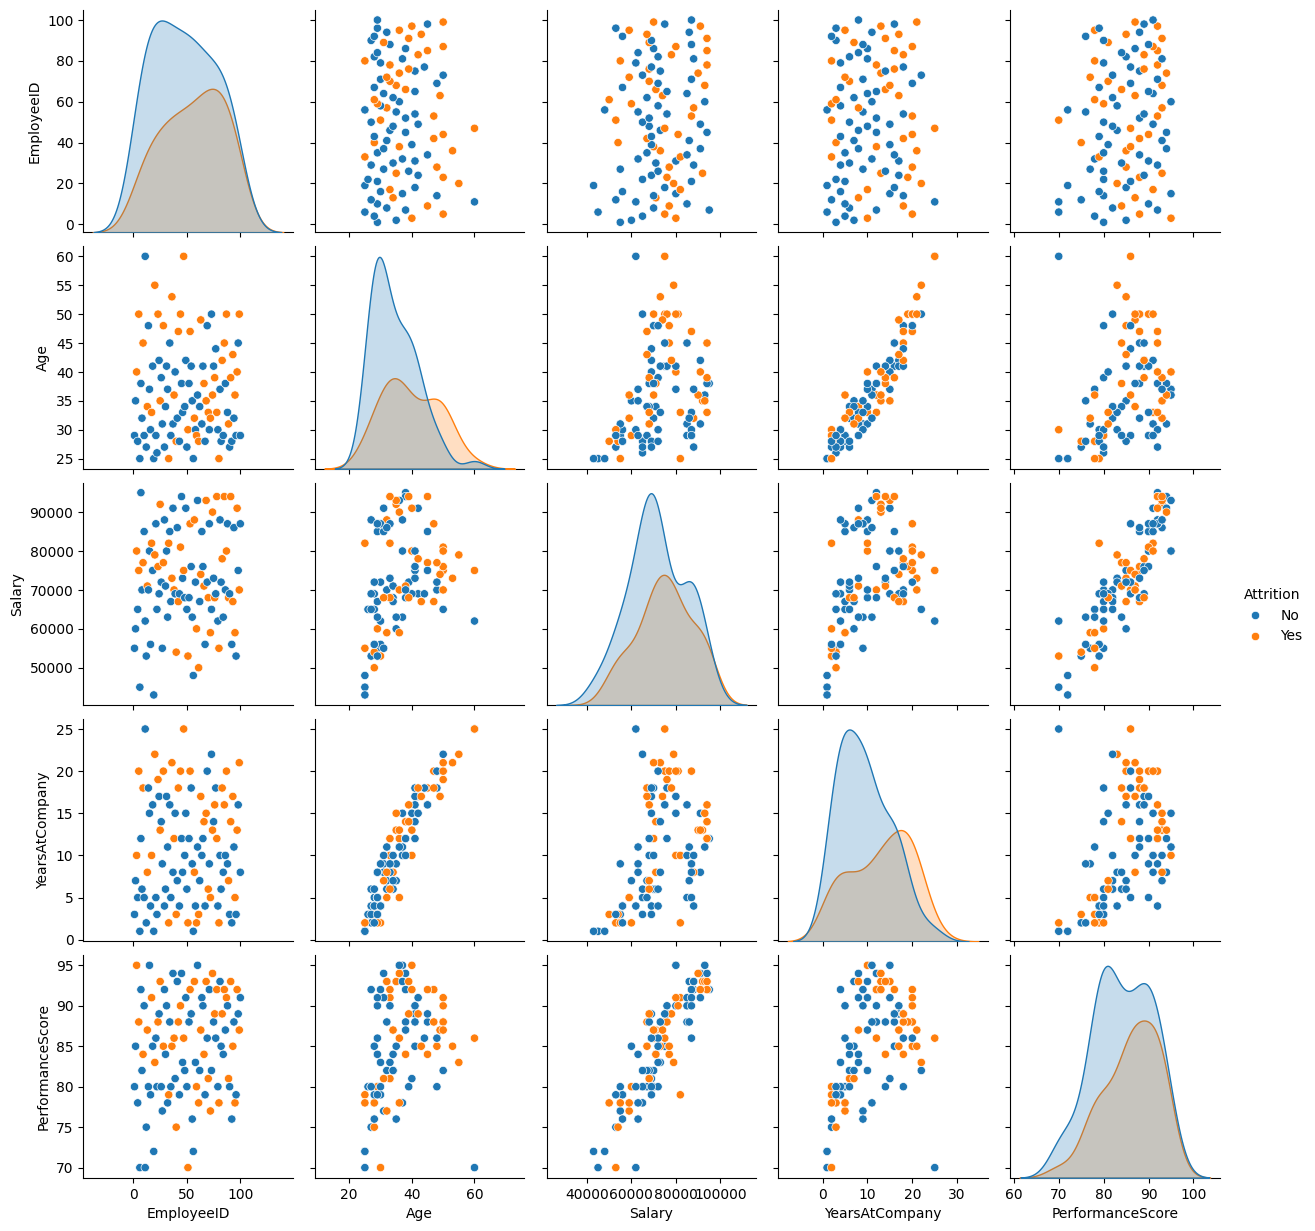

In [61]:
# plotting the pairplot
sns.pairplot(data, hue="Attrition")
plt.show()

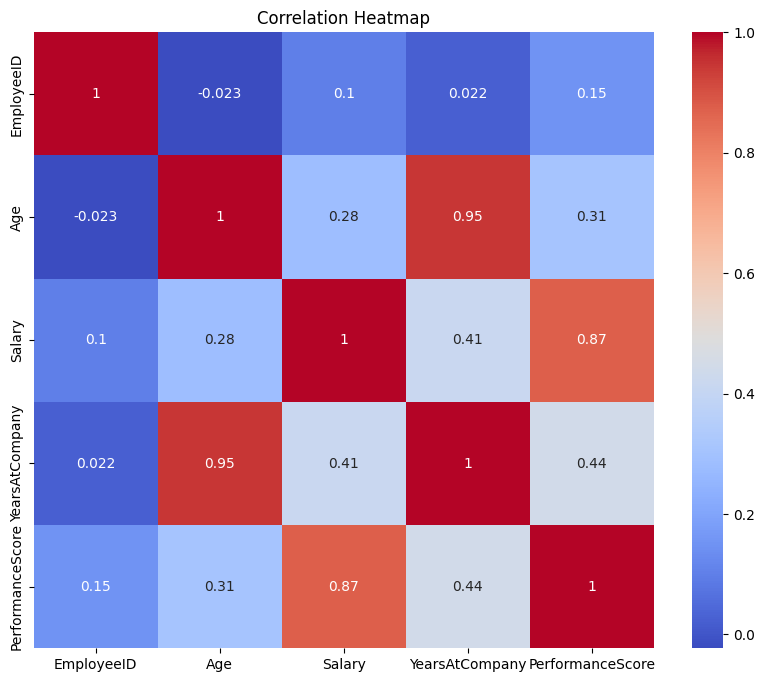

In [62]:
#plotting the correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

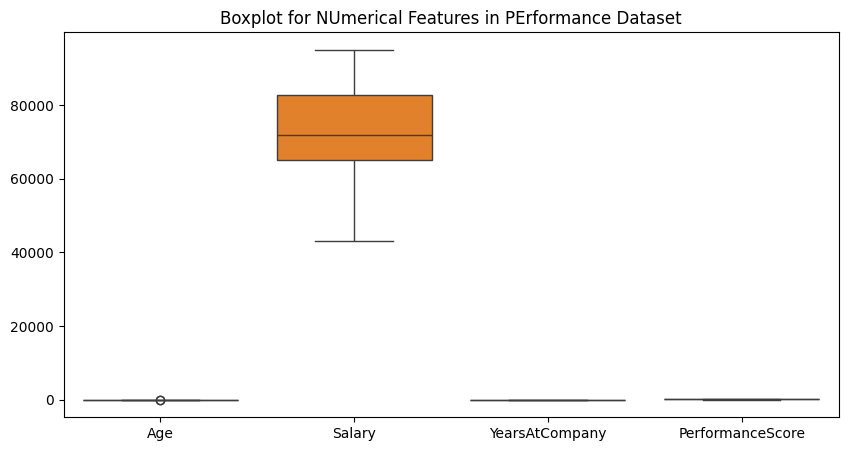

In [63]:
#plotting the boxplot for numerical features
plt.figure(figsize=(10,5))
sns.boxplot(data=data[["Age", "Salary", "YearsAtCompany", "PerformanceScore"]])
plt.title("Boxplot for NUmerical Features in PErformance Dataset")
plt.show()


In [64]:
# Probability and Statistical Analysis
#probability of Attrition
prob_attrition = data["Attrition"].value_counts(normalize=True)
prob_attrition

Attrition
No     0.61
Yes    0.39
Name: proportion, dtype: float64

In [65]:
#probability of attrition by department
pd.crosstab(data["Department"], data["Attrition"], normalize="index")

Attrition,No,Yes
Department,,
Engineering,0.571429,0.428571
HR,0.653846,0.346154
Marketing,0.800000,0.200000
Sales,0.461538,0.538462


In [66]:
data["PerformanceScore"].describe()

count    100.000000
mean      84.940000
std        6.349771
min       70.000000
25%       80.000000
50%       85.500000
75%       90.000000
max       95.000000
Name: PerformanceScore, dtype: float64

In [67]:
data["PerformanceScore"].value_counts()

PerformanceScore
80    9
92    7
88    7
85    6
93    6
90    5
78    5
86    5
89    5
91    5
79    5
84    4
82    4
87    4
95    3
70    3
81    3
94    3
83    3
72    2
75    2
77    2
76    2
Name: count, dtype: int64

Bayes’ Theorem (Attrition | Low Performance) (using original data)


In [68]:
df0 = pd.read_csv("employee_data.csv")

In [69]:
low_perf = df0[df0["PerformanceScore"] < 3]

p_attrition = len(df0[df0["Attrition"] == "Yes"]) / len(df0)
p_low_perf = len(low_perf) / len(df0)
if p_low_perf != 0:
    p_attrition_given_low = len(low_perf[low_perf['Attrition']=="Yes"]) / len(df0)

    bayes = p_attrition_given_low/ p_low_perf
    print("Probability of Attrition|Low Performance =", bayes)

else:
   print("No low performance employee found.") 

No low performance employee found.


In [70]:
#Hypothesis Testing
from scipy.stats import f_oneway

dept_groups = [data[data["Department"] == d]["PerformanceScore"] for d in data["Department"].unique()]
f_stat, p_value = f_oneway(*dept_groups)
f_stat, p_value

(np.float64(25.781068086646336), np.float64(2.5591493445552065e-12))

In [71]:
#Predictive modeling
#Features engineering and encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
data["Attrition"] = le.fit_transform(data["Attrition"])
data["Department"] = le.fit_transform(data["Department"])

scaler = StandardScaler()
data[["Salary", "PerformanceScore"]] = scaler.fit_transform(data[["Salary", "PerformanceScore"]])

In [72]:
# Employee Attrition Prediction Model
from sklearn.model_selection import train_test_split

x = data.drop(["Attrition", "Name", "EmployeeID"], axis=1)
y = data["Attrition"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [73]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [74]:
#Model evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.40      0.29      0.33         7

    accuracy                           0.60        20
   macro avg       0.53      0.53      0.52        20
weighted avg       0.57      0.60      0.58        20



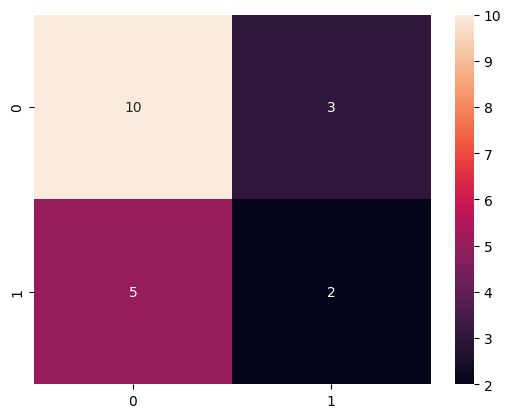

In [75]:
#Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt ="d")
plt.show()

In [76]:
#Employeee Performance Prediction
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()

x = data.drop(["PerformanceScore", "Name", "EmployeeID" ], axis=1)
y = data["PerformanceScore"]

x_train, x_test, y_train, y_test

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Mean Square Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Square Error: 0.2622832136204554
R2 Score: -0.15289324668332038


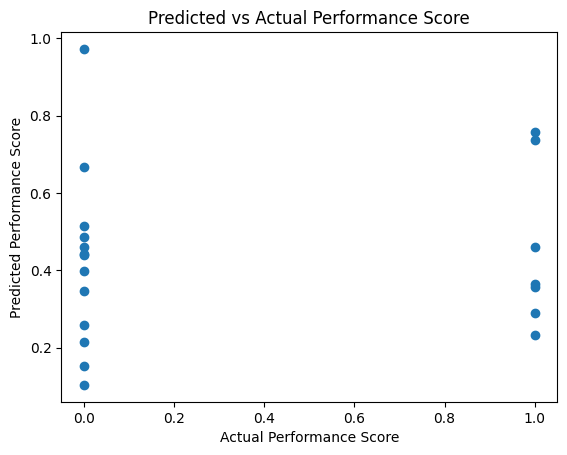

In [77]:
# Plotting a Predict Vs Actual graph
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Predicted vs Actual Performance Score")
plt.show()

Deep Learning Model


In [78]:
# Deep Learning Performance Prediction Model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_dl = Sequential([Dense(64, activation = "relu", input_shape=(x_train.shape[1],)),Dense(30, activation= "relu"), Dense(1)])

model_dl.compile(optimizer= "adam", loss= "mse")
model_dl.fit(x_train, y_train, epochs= 50, batch_size = 16)


Epoch 1/50


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.5389   
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7944 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4998
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6860
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3837 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3980 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2919 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3012 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2736 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2679 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2522 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2403 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2298 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2277 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2262 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms

In [79]:
model_attr = Sequential([Dense(64, activation='relu', input_shape=(x_train.shape[1],)), Dense(32, activation='relu'), Dense(1, activation='sigmoid')])

model_attr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_attr.fit(x_train, y_train, epochs = 50, batch_size=16)

Epoch 1/50


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5625 - loss: 0.7924  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5500 - loss: 0.7521 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5375 - loss: 0.7071 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6250 - loss: 0.6766 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6125 - loss: 0.6616 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5875 - loss: 0.6621 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6750 - loss: 0.6521 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7000 - loss: 0.6407 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6625 - loss: 0.6450 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6500 - loss: 0.6322 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6750 - loss: 0.6298 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7125 - loss: 0.6320 
Epoch 13/50

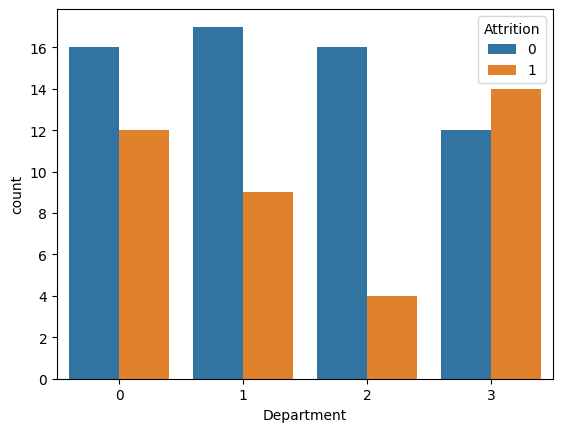

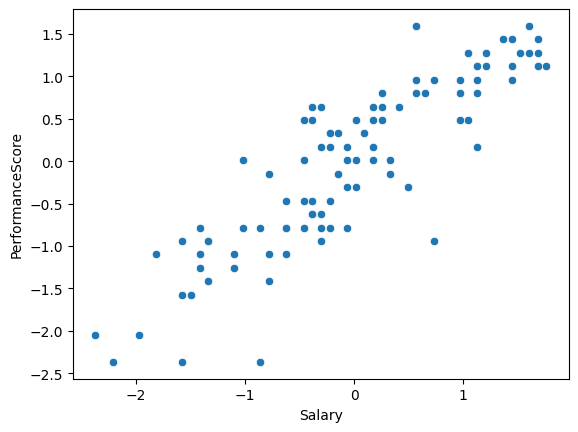

In [80]:
# Department-wise attrition
sns.countplot(x='Department', hue='Attrition', data=data)
plt.show()

# Salary vs Performance
sns.scatterplot(x="Salary", y = "PerformanceScore", data=data)
plt.show()
                
